# Effect of the judgement-of-association task

During our study, the participants were asked, after the presentation of a word-pair, to judge whether the two words were related. When prompted, they pressed one of two buttons to answer with "yes" or "no". In this notebook, we explore whether the measured amplitude of the N400 component carries more information than the behavioral responses of the participants.

In [1]:
# Import Pandas data handing module
import pandas as pd

# For pretty display of tables
from IPython.display import display

# Load the data
data = pd.read_csv('data.csv', index_col=['subject', 'cue-english', 'association-english'])
data = data.sort_index()

# Transform the "raw" N400 amplitudes into distance measurements according to the equation above
data['distance'] = data['N400'] - data.groupby(['subject', 'association-english'])['N400'].transform('mean')

# Show the first 10 rows
display(data.head(10))

cue association language  button  \
subject   cue-english association-english                                     
subject01 bed         chair                bed       stoel       NL       0   
                      closet               bed        kast       NL       0   
                      couch                bed       zetel       NL       0   
                      desk                 bed      bureau       NL       0   
                      door                 bed        deur       NL       1   
                      elephant             bed     olifant       NL       1   
                      giraffe              bed       giraf       NL       1   
                      hippopotamus         bed   nijlpaard       NL       1   
                      lion                 bed       leeuw       NL       1   
                      rhinoceros           bed   neushoorn       NL       1   

                                               N400  distance  
subject   cue-english association-english                      
subject01 bed         chair                1.167588  1.042933  
                      closet               0.663112  0.406510  
                      couch               -0.043291 -0.212449  
                      desk                 0.540305  0.439368  
                      door                 1.157838  0.768997  
                      elephant            -0.362098  0.019439  
                      giraffe             -0.893464 -0.901362  
                      hippopotamus        -0.376147  0.267201  
                      lion                -0.650190 -0.387616  
                      rhinoceros           0.021397  0.193552

The behavior of the participants was very systematic. Except for the occasional error, whenever two words belonged to the same "animal" or "furniture" category, they would judge them as related, and unrelated otherwise. You can clearly see this when plotting the average button response (0=related, 1=unrelated) to each word-pair.

association-english,elephant,giraffe,hippopotamus,lion,rhinoceros,tiger,zebra,bed,chair,closet,couch,desk,door,table
cue-english,,,,,,,,,,,,,,
elephant,NaN,0.0625,0.0000,0.0000,0.0000,0.0625,0.0625,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9375
giraffe,0.0625,NaN,0.0000,0.0000,0.1250,0.0625,0.1250,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
hippopotamus,0.0625,0.1250,NaN,0.0000,0.0000,0.1250,0.1250,0.9375,1.0000,1.0000,0.9375,1.0000,1.0000,1.0000
lion,0.0625,0.0625,0.0625,NaN,0.0625,0.0000,0.0625,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
rhinoceros,0.1250,0.0625,0.0625,0.1250,NaN,0.0625,0.0000,1.0000,1.0000,1.0000,1.0000,0.9375,1.0000,1.0000
tiger,0.1250,0.0625,0.1250,0.0625,0.0625,NaN,0.0625,0.9375,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
zebra,0.1250,0.0000,0.0000,0.1250,0.0625,0.1250,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
bed,1.0000,1.0000,1.0000,0.9375,1.0000,1.0000,1.0000,NaN,0.1250,0.0625,0.1250,0.1250,0.1875,0.0625
chair,0.9375,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1875,NaN,0.1250,0.0625,0.0000,0.1250,0.0625


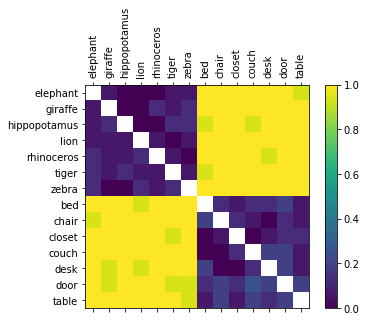

In [2]:
# Compute the average button responses for each cue-association pair
mean_button_response = data.groupby(['cue-english', 'association-english'])['button'].agg('mean').reset_index()

# Reshape the data into a cue-association word matrix
matrix = mean_button_response.pivot(index='cue-english', columns='association-english', values='button')

# Re-order the rows and columns so that animals are sorted before furniture
animals = ['elephant', 'giraffe', 'hippopotamus', 'lion', 'rhinoceros', 'tiger', 'zebra']
furniture = ['bed', 'chair', 'closet', 'couch', 'desk', 'door', 'table']
order = animals + furniture
matrix = matrix.loc[order, order]

# Display the matrix
display(matrix)

# Plot the matrix as a heatmap
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 4))
plt.matshow(matrix.values, fignum=1)
plt.xticks(range(14), matrix.columns, rotation=90)
plt.yticks(range(14), matrix.index)
plt.colorbar()

The dendrogram in figure 3 of the manuscript suggests that there is a subcluster inside the furniture items that has a significant difference in the amplitude of the N400 component. We now test if this difference persists when we restrict the data to only trials for which the participants pressed the "words are related" button.

In [8]:
# Limit the data to just the furniture items
furniture_only = data.loc(axis=0)[:, furniture, furniture]

# Limit the data to just the trials for which the participant pressed the "words are related" button
related_response_only = furniture_only.query('button == 0')

# Assign within-cluster and between-cluster labels, based on the subclusters in figure 3 of the manuscript
cluster1 = ['desk', 'bed', 'closet']
cluster2 = ['door', 'table', 'chair', 'couch']
related_response_only = related_response_only.assign(label = [
    'within' if (a in cluster1 and b in cluster1) or (a in cluster2 and b in cluster2) else 'between'
    for a, b in zip(related_response_only.index.get_level_values('cue-english'),
                    related_response_only.index.get_level_values('association-english'))
])

# Display the first 10 rows
display(related_response_only.head(10))

print('The total number of selected trials is: %d' % len(related_response_only))

cue association language  button  \
subject   cue-english association-english                                       
subject01 bed         chair                  bed       stoel       NL       0   
                      closet                 bed        kast       NL       0   
                      couch                  bed       zetel       NL       0   
                      desk                   bed      bureau       NL       0   
                      table                  bed       tafel       NL       0   
          chair       bed                  stoel         bed       NL       0   
                      closet               stoel        kast       NL       0   
                      couch                stoel       zetel       NL       0   
                      desk                 stoel      bureau       NL       0   
                      table                stoel       tafel       NL       0   

                                               N400  distance    label  
subject   cue-english association-english                               
subject01 bed         chair                1.167588  1.042933  between  
                      closet               0.663112  0.406510   within  
                      couch               -0.043291 -0.212449  between  
                      desk                 0.540305  0.439368   within  
                      table               -0.471544 -0.647144  between  
          chair       bed                  1.922671  1.945818  between  
                      closet               1.034089  0.777487  between  
                      couch               -0.685802 -0.854959   within  
                      desk                -0.333378 -0.434315  between  
                      table                0.654920  0.479320   within

The total number of selected trials is: 598


In [4]:
# Bring in a bridge to R for statistics
import rpy2
%load_ext rpy2.ipython.rmagic

# The R code at the bottom produces some harmless warnings that clutter up the page.
# This disables printing of the warnings. When modifying this notebook, you may want to turn
# this back on.
import warnings
warnings.filterwarnings('ignore')

# To transfer this data frame, the index must be reset
related_response_only = related_response_only.reset_index()

In [5]:
%%R -i related_response_only

library('lme4')
library('lmerTest')

# Fit a LME model to test whether there is a difference between the within-cluster and between-cluster distance values
m <- lmer(distance ~ label + (label | subject), data=related_response_only)
print(summary(m))

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: distance ~ label + (label | subject)
   Data: related_response_only

REML criterion at convergence: 1671.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.97859 -0.67919  0.00724  0.69329  3.01017 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subject  (Intercept) 0.04869  0.2207        
          labelwithin 0.10743  0.3278   -1.00
 Residual             0.92964  0.9642        
Number of obs: 598, groups:  subject, 16

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)  0.03506    0.07609 13.58000   0.461   0.6523  
labelwithin -0.30368    0.11480 12.77800  -2.645   0.0204 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
labelwithin -0.834


Even when the data is limited to a set of trials for which there is no difference in behavioral response (the response was always "the words are related"), differences in the amplitude of the N400 component persist. This leads us to conclude that the distance metric used by our proposed method does capture effects beyond the measured behavioral data.